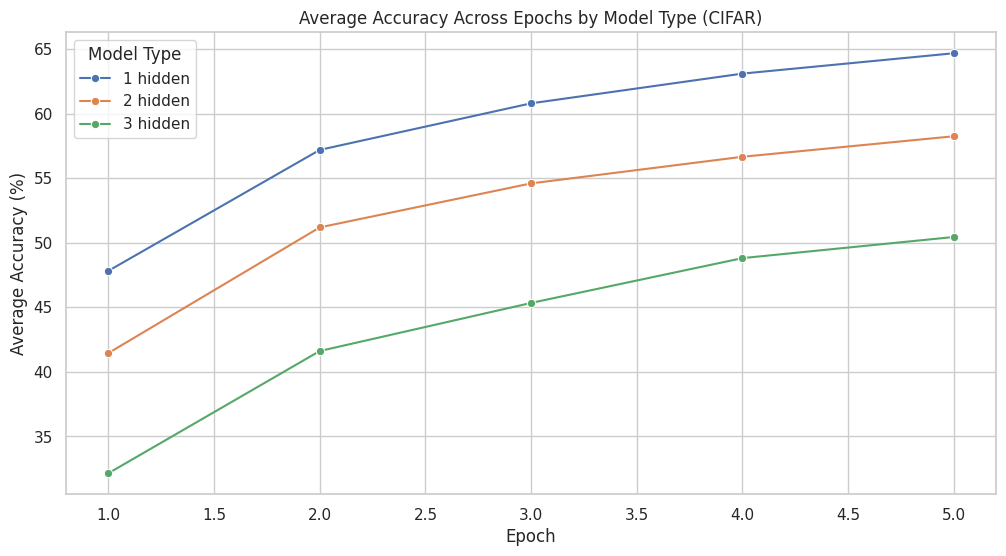

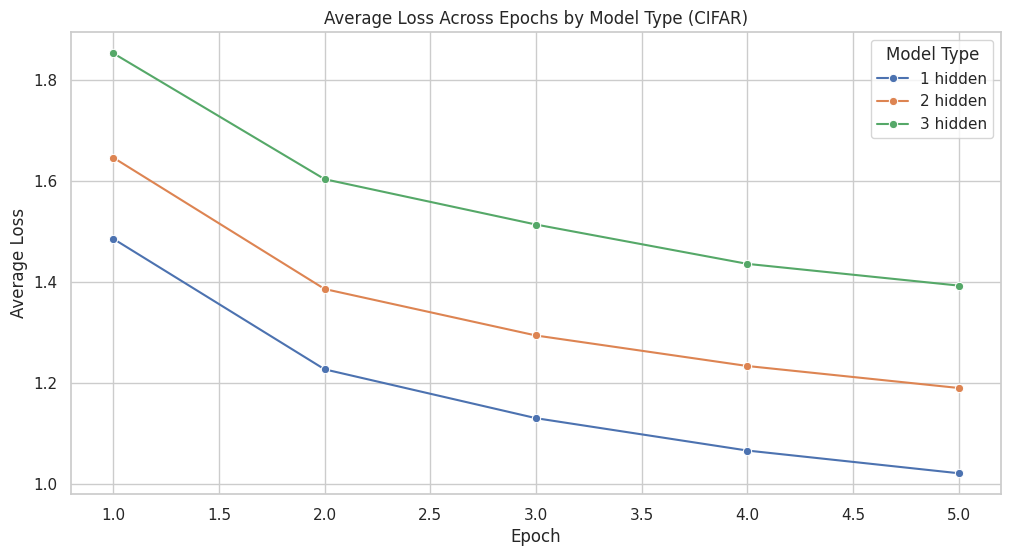

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from conv_config import one_layer_configs, two_layer_configs, three_layer_configs

data = pd.read_csv('cifar_training_metrics.csv')
# Group by 'Model Type' and 'Epoch' and calculate the mean of 'Accuracy' and
# 'Loss'
epoch_performance = data.groupby(['Model Type', 'Epoch']).agg(
    Average_Accuracy=('Accuracy', 'mean'),
    Average_Loss=('Loss', 'mean')
).reset_index()

sns.set(style="whitegrid")

# Plot for Average Accuracy
plt.figure(figsize=(12, 6))
sns.lineplot(data=epoch_performance, x='Epoch', y='Average_Accuracy',
             hue='Model Type', marker='o')
plt.title('Average Accuracy Across Epochs by Model Type (CIFAR)')
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy (%)')
plt.legend(title='Model Type', loc='upper left')

# Plot for Average Loss
plt.figure(figsize=(12, 6))
sns.lineplot(data=epoch_performance, x='Epoch', y='Average_Loss',
             hue='Model Type', marker='o')
plt.title('Average Loss Across Epochs by Model Type (CIFAR)')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend(title='Model Type', loc='upper right')

plt.show()

<Figure size 1000x800 with 0 Axes>

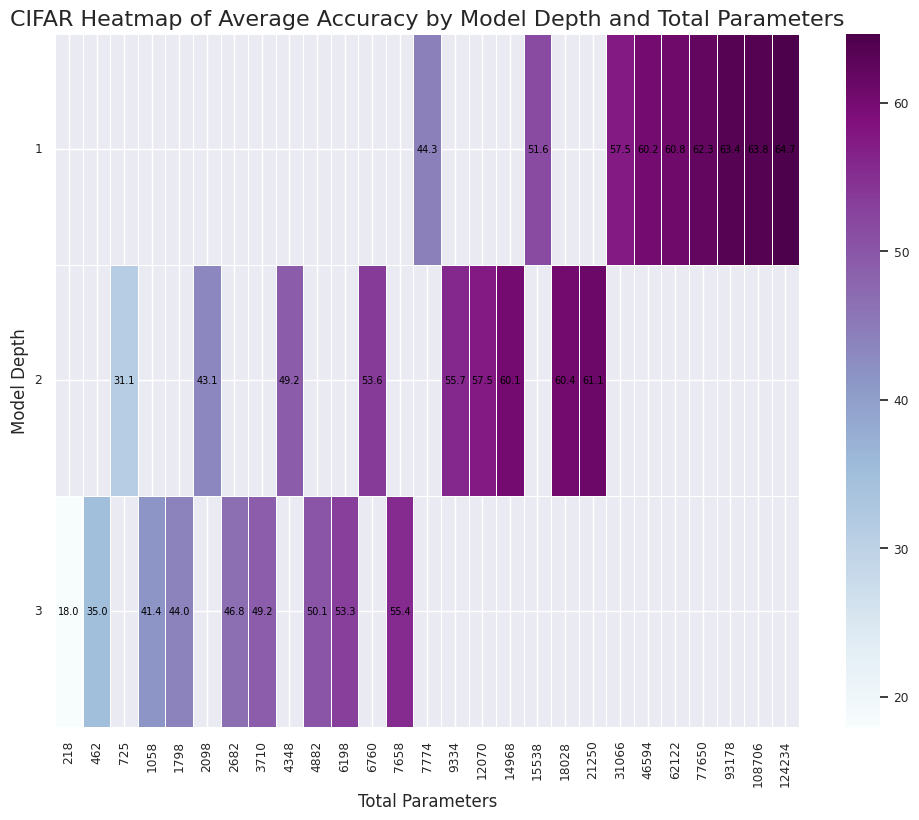

In [2]:
data['Model Depth'] = data['Model Type'].str.extract(r'(\d+)').astype(int)

# Calculate the average accuracy
average_accuracy = (data.groupby(['Model Depth', 'Total Parameters'])['Accuracy'].mean().reset_index())

pivot_table = average_accuracy.pivot(index='Model Depth', columns='Total Parameters', values='Accuracy')

plt.figure(figsize=(10, 8))
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 9))
ax = sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, cmap="BuPu",
                 annot_kws={"size": 7, "color": "black"})

plt.title('CIFAR Heatmap of Average Accuracy by Model Depth and Total Parameters', fontsize=16)
plt.xlabel('Total Parameters', fontsize=12)
plt.ylabel('Model Depth', fontsize=12)

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

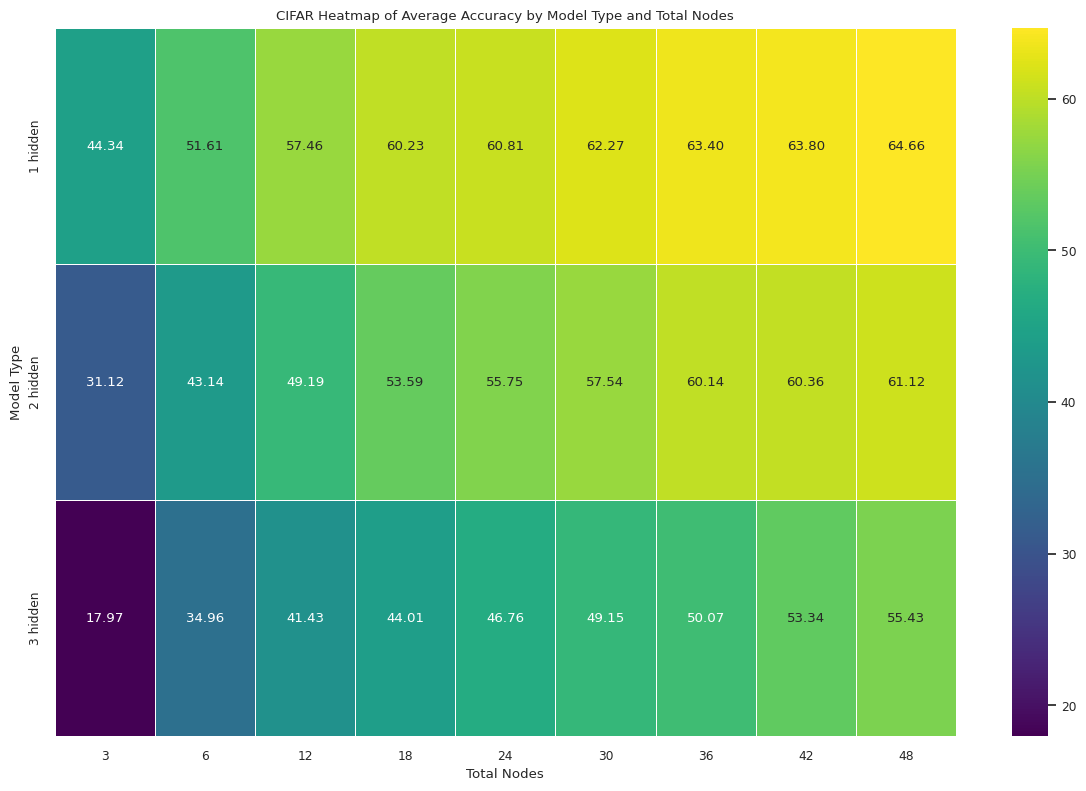

In [3]:
def calculate_total_nodes(row):
    model_size = eval(row['Model Size'])
    total_nodes = 0
    if row['Model Type'] == '1 hidden':
        total_nodes = model_size[1]
    elif row['Model Type'] == '2 hidden':
        total_nodes = model_size[1] + model_size[6]
    elif row['Model Type'] == '3 hidden':
        total_nodes = model_size[1] + model_size[6] + model_size[12]

    return total_nodes

data['Total Nodes'] = data.apply(calculate_total_nodes, axis=1)

average_accuracy2 = data.groupby(['Model Type', 'Total Nodes'])['Accuracy'].mean().reset_index()
pivot_table = average_accuracy2.pivot_table(index='Model Type', columns='Total Nodes', values='Accuracy')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis", linewidths=.5)

# Labels and titles
plt.title('CIFAR Heatmap of Average Accuracy by Model Type and Total Nodes')
plt.xlabel('Total Nodes')
plt.ylabel('Model Type')

plt.tight_layout()
plt.show()

In [4]:
df = pd.read_csv('cifar_test_results.csv')

# Group by 'Model Type' and calculate the mean and standard deviation
# for accuracy and loss
stats = df.groupby('Model Type').agg(
    Average_Accuracy=('Accuracy', 'mean'),
    Std_Accuracy=('Accuracy', 'std'),
    Average_Loss=('Average Test Loss', 'mean'),
    Std_Loss=('Average Test Loss', 'std')
).reset_index()

stats

,Model Type,Average_Accuracy,Std_Accuracy,Average_Loss,Std_Loss
0,1 hidden,60.714444,6.186813,1.130480,0.161384
1,2 hidden,57.247778,10.678360,1.212911,0.284231
2,3 hidden,50.480000,10.128981,1.384389,0.276265


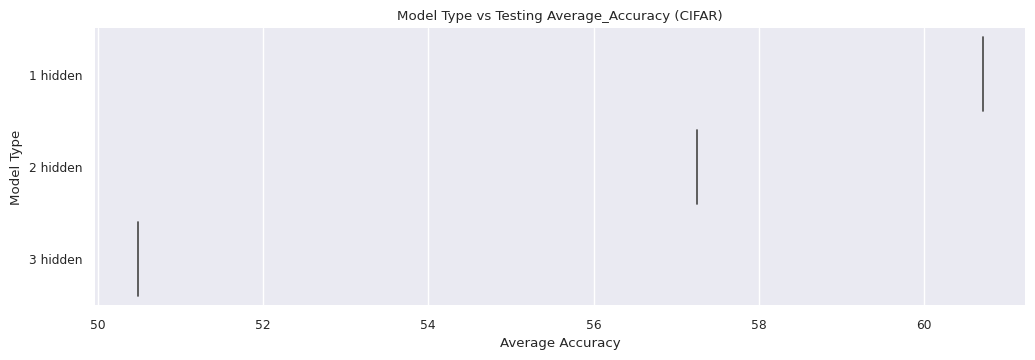

In [5]:
# @title Model Type vs Average_Accuracy (CIFAR)

figsize = (12, 1.2 * len(stats['Model Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(stats, x='Average_Accuracy', y='Model Type', inner='stick')
plt.xlabel("Average Accuracy")
plt.title("Model Type vs Testing Average_Accuracy (CIFAR)")
sns.despine(top=True, right=True, bottom=True, left=True)

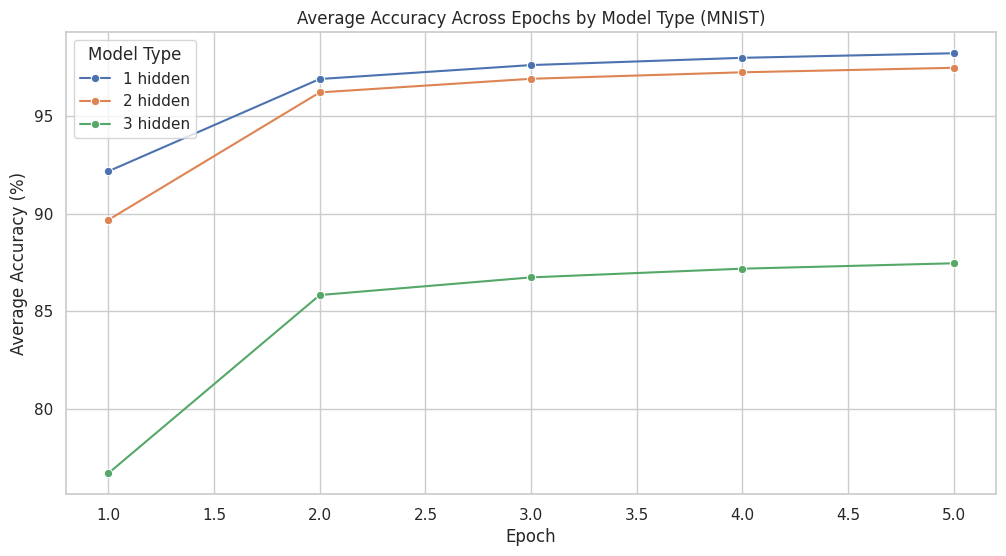

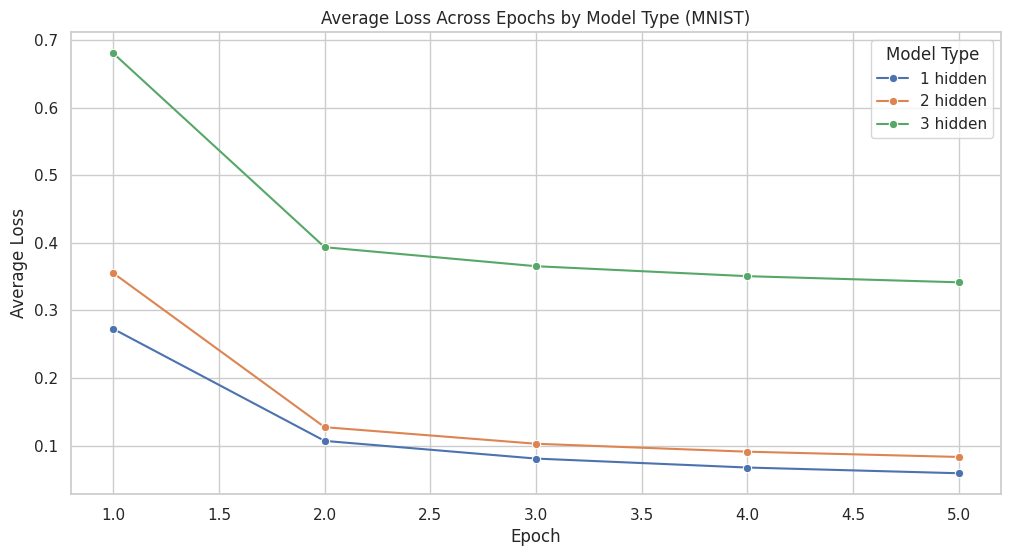

In [6]:
data = pd.read_csv('mnist_training_metrics.csv')
# Group by 'Model Type' and 'Epoch' and calculate the mean of 'Accuracy' and
# 'Loss'
epoch_performance = data.groupby(['Model Type', 'Epoch']).agg(
    Average_Accuracy=('Accuracy', 'mean'),
    Average_Loss=('Loss', 'mean')
).reset_index()

sns.set(style="whitegrid")

# Plot for Average Accuracy
plt.figure(figsize=(12, 6))
sns.lineplot(data=epoch_performance, x='Epoch', y='Average_Accuracy',
             hue='Model Type', marker='o')
plt.title('Average Accuracy Across Epochs by Model Type (MNIST)')
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy (%)')
plt.legend(title='Model Type', loc='upper left')

# Plot for Average Loss
plt.figure(figsize=(12, 6))
sns.lineplot(data=epoch_performance, x='Epoch', y='Average_Loss',
             hue='Model Type', marker='o')
plt.title('Average Loss Across Epochs by Model Type (MNIST)')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend(title='Model Type', loc='upper right')

plt.show()


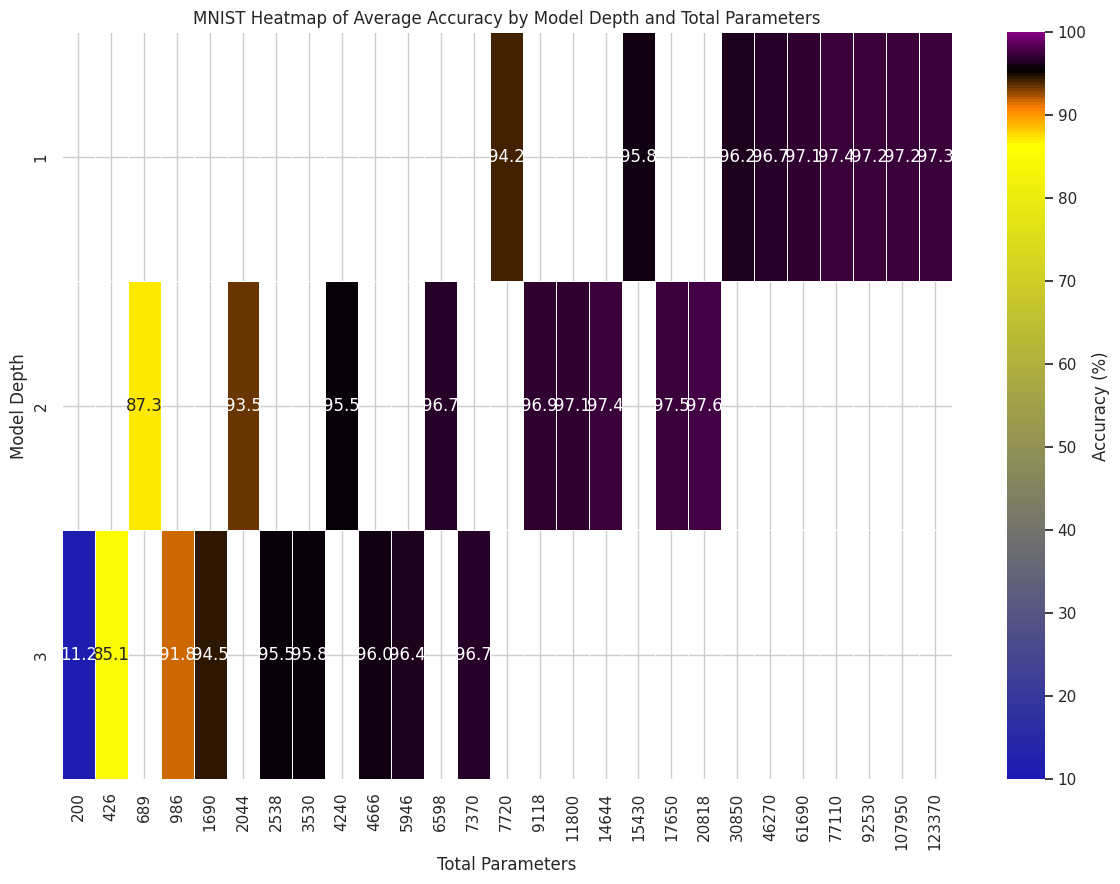

In [7]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import numpy as np

data['Model Depth'] = data['Model Type'].str.extract(r'(\d+)').astype(int)

# Calculate the average accuracy
average_accuracy = (data.groupby(['Model Depth', 'Total Parameters'])['Accuracy'].mean().reset_index())

pivot_table = average_accuracy.pivot(index='Model Depth', columns='Total Parameters', values='Accuracy')

cdict = {
    'red':   ((0.0,  0.1, 0.1),
              (0.85,  1.0, 1.0),
              (0.9,  1.0, 1.0),
              (0.95, 0.0, 0.0),
              (1.0,  0.5, 0.5)),

    'green': ((0.0,  0.1, 0.1),
              (0.85,  1.0, 1.0),
              (0.9,  0.5, 0.5),
              (0.95, 0.0, 0.0),
              (1.0,  0.0, 0.0)),

    'blue':  ((0.0,  0.7, 0.7),
              (0.85,  0.0, 0.0),
              (0.9,  0.0, 0.0),
              (0.95, 0.0, 0.0),
              (1.0,  0.5, 0.5))
}

# Create the colormap using the dictionary
custom_cmap = LinearSegmentedColormap('Custom_Colormap', cdict)

# Plot the heatmap
plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    linewidths=.5,
    cmap=custom_cmap,
    vmin=10,     # Setting min value at 10 to include the outlier
    vmax=100,    # Setting max value at 100 since it's the max accuracy
    cbar_kws={'label': 'Accuracy (%)'}
)

# Add labels and titles
plt.title('MNIST Heatmap of Average Accuracy by Model Depth and Total Parameters')
plt.xlabel('Total Parameters')
plt.ylabel('Model Depth')

plt.tight_layout()
plt.show()

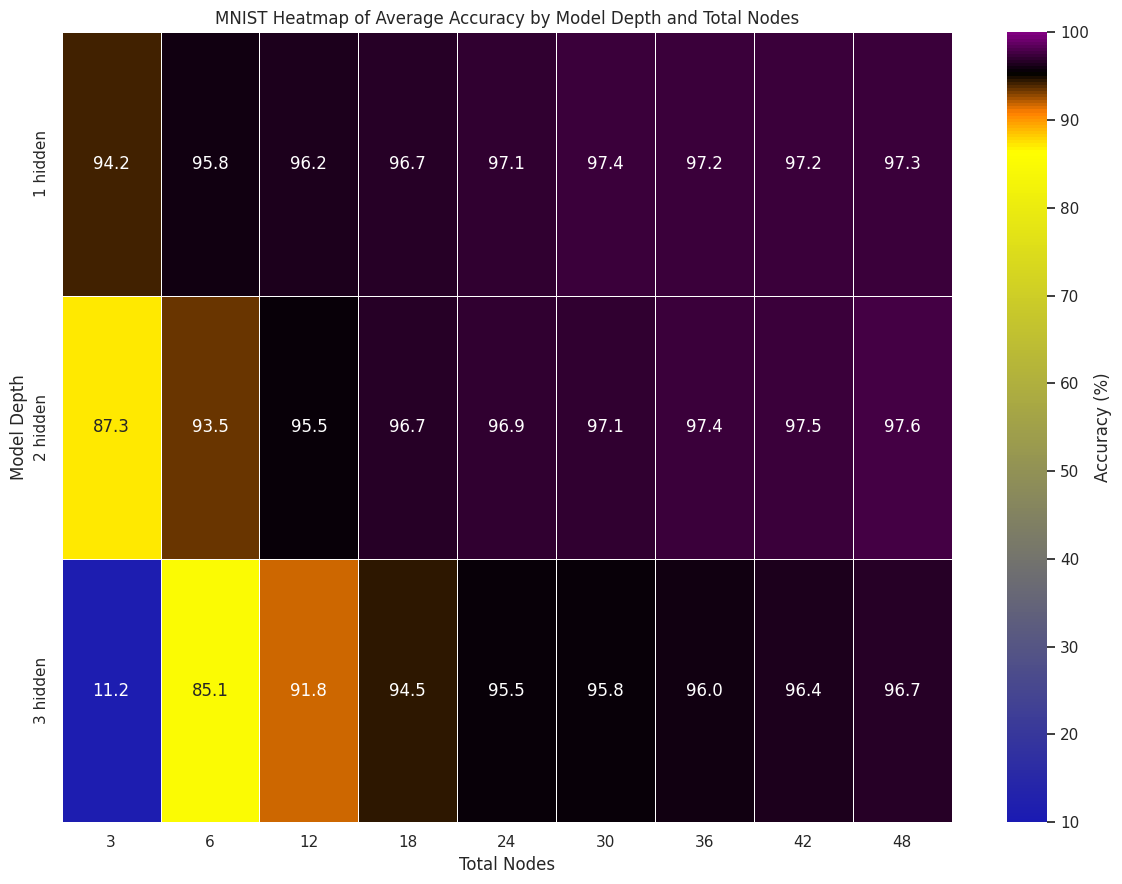

In [8]:
data['Total Nodes'] = data.apply(calculate_total_nodes, axis=1)

average_accuracy2 = data.groupby(['Model Type', 'Total Nodes'])['Accuracy'].mean().reset_index()
pivot_table = average_accuracy2.pivot_table(index='Model Type', columns='Total Nodes', values='Accuracy')
cdict = {
    'red':   ((0.0,  0.1, 0.1),
              (0.85,  1.0, 1.0),
              (0.9,  1.0, 1.0),
              (0.95, 0.0, 0.0),
              (1.0,  0.5, 0.5)),

    'green': ((0.0,  0.1, 0.1),
              (0.85,  1.0, 1.0),
              (0.9,  0.5, 0.5),
              (0.95, 0.0, 0.0),
              (1.0,  0.0, 0.0)),

    'blue':  ((0.0,  0.7, 0.7),
              (0.85,  0.0, 0.0),
              (0.9,  0.0, 0.0),
              (0.95, 0.0, 0.0),
              (1.0,  0.5, 0.5))
}

# Create the colormap using the dictionary
custom_cmap = LinearSegmentedColormap('Custom_Colormap', cdict)

# Plot the heatmap
plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    linewidths=.5,
    cmap=custom_cmap,
    vmin=10,     # Setting min value at 10 to include the outlier
    vmax=100,    # Setting max value at 100 since it's the max accuracy
    cbar_kws={'label': 'Accuracy (%)'}
)

# Add labels and titles
plt.title('MNIST Heatmap of Average Accuracy by Model Depth and Total Nodes')
plt.xlabel('Total Nodes')
plt.ylabel('Model Depth')

plt.tight_layout()
plt.show()

In [9]:
df = pd.read_csv('mnist_test_results.csv')

# Group by 'Model Type' and calculate the mean and standard deviation
# for accuracy and loss
stats = df.groupby('Model Type').agg(
    Average_Accuracy=('Accuracy', 'mean'),
    Std_Accuracy=('Accuracy', 'std'),
    Average_Loss=('Average Test Loss', 'mean'),
    Std_Loss=('Average Test Loss', 'std')
).reset_index()

stats

,Model Type,Average_Accuracy,Std_Accuracy,Average_Loss,Std_Loss
0,1 hidden,97.758889,0.513065,0.071508,0.017831
1,2 hidden,97.525556,2.590715,0.079317,0.087264
2,3 hidden,87.717778,28.723472,0.330241,0.742337


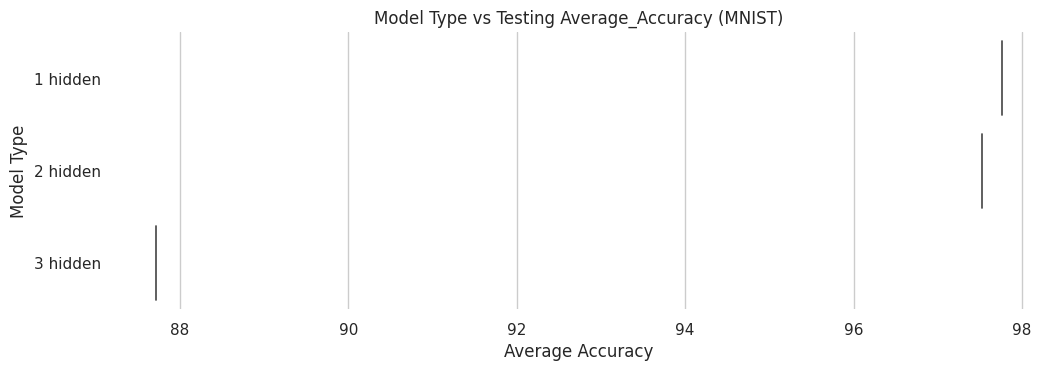

In [10]:
# @title Model Type vs Average_Accuracy (MNIST)

figsize = (12, 1.2 * len(stats['Model Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(stats, x='Average_Accuracy', y='Model Type', inner='stick')
plt.xlabel("Average Accuracy")
plt.title("Model Type vs Testing Average_Accuracy (MNIST)")
sns.despine(top=True, right=True, bottom=True, left=True)

In [31]:
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_mnist = pd.read_csv("mnist_training_metrics.csv")
df_cifar = pd.read_csv("cifar_training_metrics.csv")
df_mnist['Dataset'] = 'MNIST'
df_cifar['Dataset'] = 'CIFAR-10'
combined_df = pd.concat([df_mnist, df_cifar], ignore_index=True)
combined_df['Total_Nodes'] = combined_df.apply(calculate_total_nodes, axis=1)
combined_df['Model_Depth'] = combined_df['Model Type'].str.extract(r'(\d+)').astype(int)

accuracies = combined_df.pivot_table(index='Model Type', columns='Epoch', values='Accuracy').reset_index()

one_hidden_accuracies = accuracies[accuracies['Model Type'] == '1 hidden'].values.flatten()
two_hidden_accuracies = accuracies[accuracies['Model Type'] == '2 hidden'].values.flatten()
three_hidden_accuracies = accuracies[accuracies['Model Type'] == '3 hidden'].values.flatten()

f_statistic, p_value = f_oneway(one_hidden_accuracies[1:], two_hidden_accuracies[1:], three_hidden_accuracies[1:])

print(f"F-statistic: {f_statistic}, P-value: {p_value}")

model = smf.ols(formula='Accuracy ~ C(Model_Depth) * (Total_Nodes)', data=combined_df).fit()

print(model.summary())


F-statistic: 9.066791960101016, P-value: 0.003988253476650997
                            OLS Regression Results                            
Dep. Variable:               Accuracy   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     9.626
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.87e-08
Time:                        10:46:08   Log-Likelihood:                -1230.8
No. Observations:                 270   AIC:                             2474.
Df Residuals:                     264   BIC:                             2495.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

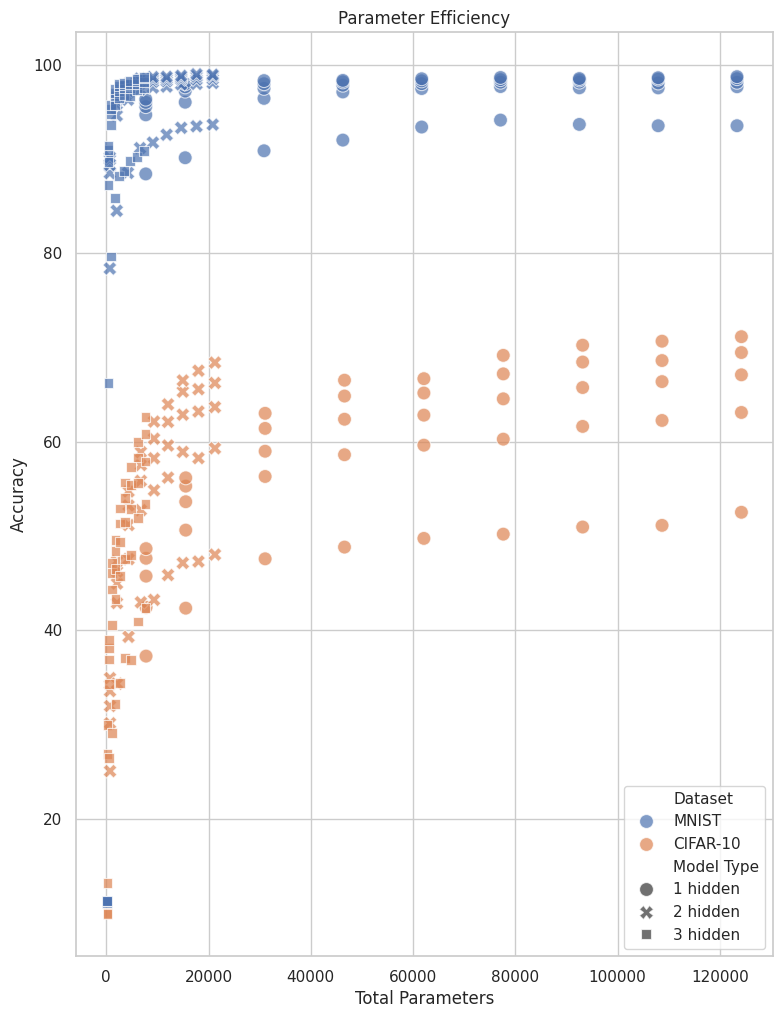

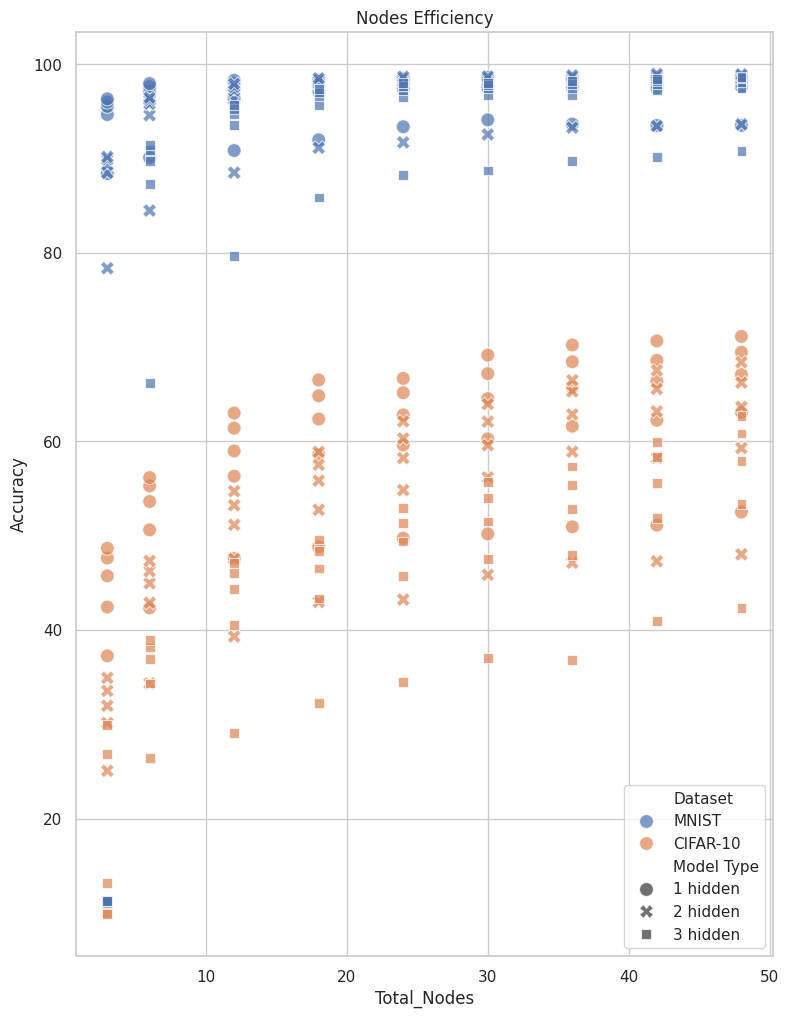

In [32]:
plt.figure(figsize=(9, 12))
sns.scatterplot(x='Total Parameters', y='Accuracy', hue='Dataset', style='Model Type', data=combined_df, s=100, alpha=0.7)
plt.title("Parameter Efficiency")
plt.show()

plt.figure(figsize=(9, 12))
sns.scatterplot(x='Total_Nodes', y='Accuracy', hue='Dataset', style='Model Type', data=combined_df, s=100, alpha=0.7)
plt.title("Nodes Efficiency")
plt.show()

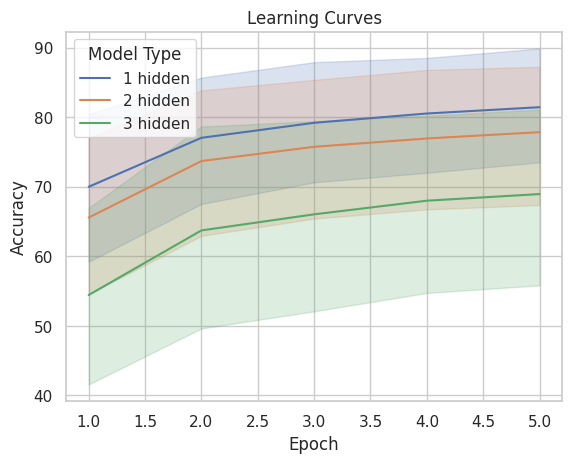

In [33]:
sns.lineplot(x='Epoch', y='Accuracy', hue='Model Type', data=combined_df)
plt.title("Learning Curves")
plt.show()